### Raíces de funciones

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

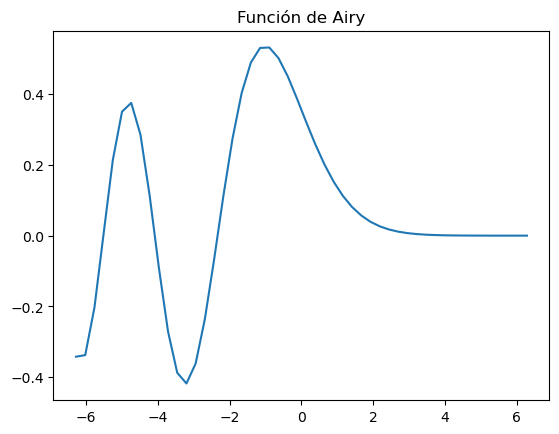

In [12]:
x = np.linspace(-2*np.pi,2*np.pi)
y = sp.airy(x)[0]

plt.title("Función de Airy")
plt.plot(x,y)
plt.show()

In [30]:
def mi_airy(x):
    return sp.airy(x)[0]

In [77]:
def raiz_bipart(f, x_izq, x_der, err = 1e-8):
    f_izq, f_med = f(x_izq), 2*err

    d_raiz = 2*err
    contador = 0
    
    while abs(f_med) >= err and d_raiz>= err: 
        
        x_med = 0.5*(x_izq + x_der)
        f_med = f(x_med)

        if (f_med * f_izq < 0):
            x_der = x_med
        else:
            x_izq = x_med
            f_izq = f_med

        contador += 1
        d_raiz = abs(x_izq-x_der)
        # print(contador, '\t f =', f_med, '\t x0 =',x_med)

    return x_med

In [78]:
x0 = raiz_bipart(mi_airy, -3, -2)

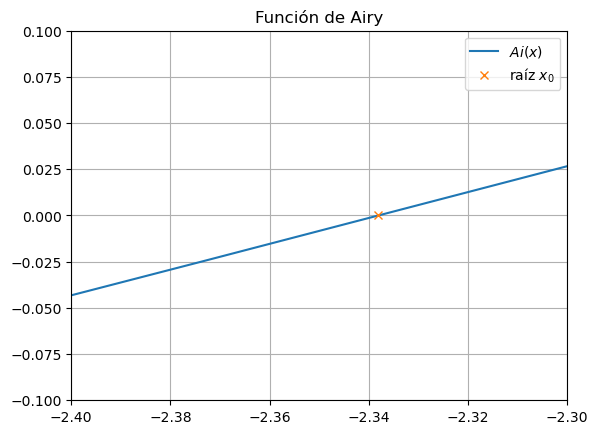

In [79]:
x = np.linspace(-5,5,100)
y = sp.airy(x)[0]
plt.title("Función de Airy")
plt.plot(x,y,label=r"$Ai(x)$")
plt.plot(x0,[0],'x',label=r"raíz $x_0$")
plt.xlim([-2.4,-2.3]), plt.ylim([-0.1,0.1])
plt.grid(),plt.legend()
plt.show()